In [52]:
import pandas as pd

from pandas import DataFrame, TimeSeries

import numpy as np

from  matplotlib import pyplot as plt


%matplotlib inline

In [11]:
df = pd.read_excel("zg-averages-data.xlsx")
df.tail()

,year,mon,avg
547,1996,8,20.7
548,1996,9,14.1
549,1996,10,12.2
550,1996,11,8.3
551,1996,12,-0.9


In [20]:
df["year"].tail()

547    1996
548    1996
549    1996
550    1996
551    1996
Name: year, dtype: int64

In [22]:
df.year.tail()

547    1996
548    1996
549    1996
550    1996
551    1996
Name: year, dtype: int64

In [33]:
df1 = df[ df.year < 1980 ]
df2 = df1[ df1.year>=1970]
df2.tail();

**Zadatak 1**

Ispišite sve retke za koje vrijedi da je prosječna temperatura bila negativna.

In [35]:
all ( df.avg < 0 )

False

** Zadatak 2**

Nacrtajmo graf kretanja temperatura za 1994. godinu

In [41]:
yr1994 = df[ df.year == 1994].avg
yr1994.plot()

In [ ]:
yr1994 = df[ df.year == 1994].avg
yr1994.plot(figsize=(16,4))

** Zadatak 3 **

Izračunajmo prosjeke temperatura po mjesecima.

Npr. prosječna temperatura u siječnju, itd.

One-liner rješenje (ali ružno)

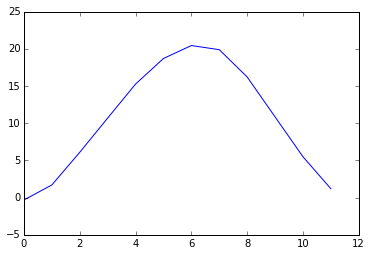

In [54]:
plt.plot([np.mean(df[df.mon == i].avg) for i in range(1,13)]);

Rješenje s grupiranjem

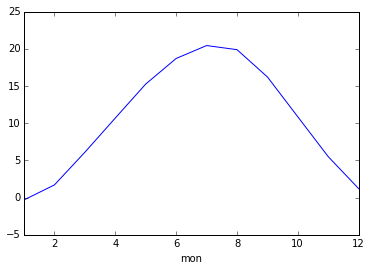

In [64]:
df.groupby("mon").aggregate(np.mean).avg.plot();

** Zadatak **

Izračunati korelaciju između broja mjeseca i prosječne mjesečne temperature.

In [65]:
df.corr()

,year,mon,avg
year,1.000000,0.000000,0.028486
mon,0.000000,1.000000,0.204373
avg,0.028486,0.204373,1.000000


In [67]:
df[   ["mon","avg"]  ].corr()

,mon,avg
mon,1.000000,0.204373
avg,0.204373,1.000000


** Zadatak **

Izračunati korelaciju između broja mjeseca i prosječne mjesečne temperature za prvu i posebno za 
drugu polovicu godine.

In [73]:
sf = df[   ["mon","avg"]  ] 
sf[ sf.mon < 7].corr()

,mon,avg
mon,1.000000,0.951534
avg,0.951534,1.000000


In [74]:
sf = df[   ["mon","avg"]  ] 
sf[ sf.mon > 6].corr()

,mon,avg
mon,1.000000,-0.959003
avg,-0.959003,1.000000


** Zadatak **

U stupac ```d.odst``` upisati odstupanje od prosjeka.

Npr. koliko siječan 1951. odstupa od prosjeka (svih siječanja).

In [75]:
df.head()

,year,mon,avg
0,1951,1,2.9
1,1951,2,5.0
2,1951,3,6.2
3,1951,4,11.1
4,1951,5,15.6


In [78]:
df["odst"] = 0
df.head()

,year,mon,avg,odst
0,1951,1,2.9,0
1,1951,2,5.0,0
2,1951,3,6.2,0
3,1951,4,11.1,0
4,1951,5,15.6,0


In [91]:
prosjeci = df.groupby("mon").aggregate(np.mean).avg.values

prosjeci[0]

In [93]:
def f_odst(m, a):
        return (a - prosjeci[m-1])

In [98]:
df.odst = f_odst(m = df.mon, a=df.avg)  
df.head()

,year,mon,avg,odst
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


In [101]:
df.odst = df.avg - prosjeci[df.mon - 1]
df.head()

,year,mon,avg,odst,novi_stupac
0,1951,1,2.9,3.215217,0
1,1951,2,5.0,3.297826,0
2,1951,3,6.2,0.108696,0
3,1951,4,11.1,0.408696,0
4,1951,5,15.6,0.336957,0


In [103]:
df.head()

,year,mon,avg,odst
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


** Zadatak ** 

Kako obrisati stupac iz pandas ```DataFrame``` objekta?

In [102]:
df["novi_stupac"] = 0

del df["novi_stupac"]

** Zadatak ** 

Preimenovati stupce ```DataFrame``` objekta.


In [108]:
df.columns = ["YEAR", "MON", "AVG", "ODST"]
df.head()

,YEAR,MON,AVG,ODST
0,1951,1,2.9,3.215217
1,1951,2,5.0,3.297826
2,1951,3,6.2,0.108696
3,1951,4,11.1,0.408696
4,1951,5,15.6,0.336957


In [118]:
nvec = np.arange(1,100)

In [122]:
def f(x):
    return x+2

In [123]:
b = f(nvec)
b

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

In [125]:
fv = np.vectorize(f)

In [126]:
fv (nvec)

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101])

** Zadatak **

Napraviti novi stupac u koji ćete spremiti prosječnu temperaturu u Fahrenheitima.

In [141]:
df["AVG_F"] = 0
df["AVG_F"] = 1.8*df.AVG + 32

df.head()

,YEAR,MON,AVG,ODST,AVG_F
0,1951,1,2.9,3.215217,37.22
1,1951,2,5.0,3.297826,41.00
2,1951,3,6.2,0.108696,43.16
3,1951,4,11.1,0.408696,51.98
4,1951,5,15.6,0.336957,60.08


** Zadatak ** 

Odredite najhladniji siječanj i najtopliji srpanj.

Odredite najhladnije prosjeke svih mjeseci.

In [151]:
df[df.MON == 1].min(), df[ df.MON==7].max()

(YEAR     1951.000000
 MON         1.000000
 AVG        -7.000000
 ODST       -6.684783
 AVG_F      19.400000
 dtype: float64, YEAR     1996.000000
 MON         7.000000
 AVG        23.000000
 ODST        2.563043
 AVG_F      73.400000
 dtype: float64)

In [166]:
df.groupby("MON").aggregate(max).ABS_ODST

MON
1     6.684783
2     9.902174
3     4.508696
4     3.408696
5     3.936957
6     2.300000
7     2.563043
8     4.617391
9     3.389130
10    3.845652
11    4.710870
12    4.791304
Name: ABS_ODST, dtype: float64

In [163]:
df["ABS_ODST"] = np.abs(df.ODST)
df.head()

,YEAR,MON,AVG,ODST,AVG_F,ABS_ODST
0,1951,1,2.9,3.215217,37.22,3.215217
1,1951,2,5.0,3.297826,41.00,3.297826
2,1951,3,6.2,0.108696,43.16,0.108696
3,1951,4,11.1,0.408696,51.98,0.408696
4,1951,5,15.6,0.336957,60.08,0.336957


** Zadatak **

Napravite još jednom 
```bash
git add *.ipynb
```
(potrebno je dodati i ovaj pandas notebook).

```bash
git commit -a -m 'pandas notebook'
```

Za kraj gurnuti u ```my``` repozitorij (vaš fork):
```bash
git push my master
```